In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.target = df.target.map({0:'setosa',1:'versicolor',2:'virginica'})

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
setosa = df[df.target =='setosa']
versicolor = df[df.target =='versicolor']
virginica = df[df.target =='virginica']

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

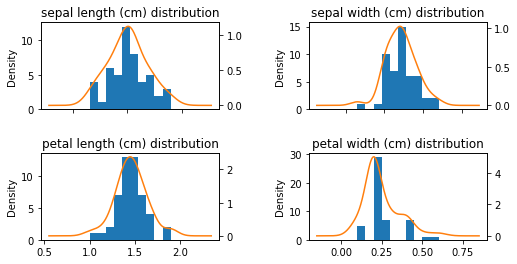

In [ ]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

setosa['sepal length (cm)'].plot(kind='hist',ax=ax[0,0])
setosa['sepal length (cm)'].plot(kind='kde',ax=ax[0,0],
                                 secondary_y = True,
                                 title = 'sepal length (cm) distribution',
                                 figsize=(8,4))

setosa['sepal width (cm)'].plot(kind='hist',ax=ax[0,1])
setosa['sepal width (cm)'].plot(kind='kde',ax=ax[0,1],
                                 secondary_y = True,
                                 title = 'sepal width (cm) distribution',
                                 figsize=(8,4))

setosa['petal length (cm)'].plot(kind='hist',ax=ax[1,0])
setosa['petal length (cm)'].plot(kind='kde',ax=ax[1,0],
                                 secondary_y = True,
                                 title = 'petal length (cm) distribution',
                                 figsize=(8,4))

setosa['petal width (cm)'].plot(kind='hist',ax=ax[1,1])
setosa['petal width (cm)'].plot(kind='kde',ax=ax[1,1],
                                 secondary_y = True,
                                 title = 'petal width (cm) distribution',
                                 figsize=(8,4))

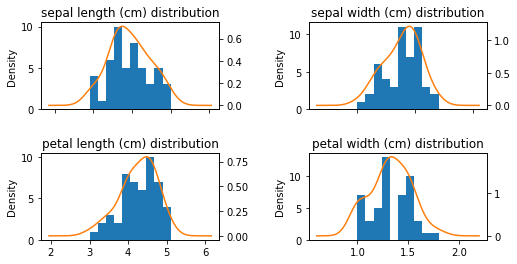

In [ ]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

versicolor['sepal length (cm)'].plot(kind='hist',ax=ax[0,0])
versicolor['sepal length (cm)'].plot(kind='kde',ax=ax[0,0],
                                 secondary_y = True,
                                 title = 'sepal length (cm) distribution',
                                 figsize=(8,4))

versicolor['sepal width (cm)'].plot(kind='hist',ax=ax[0,1])
versicolor['sepal width (cm)'].plot(kind='kde',ax=ax[0,1],
                                 secondary_y = True,
                                 title = 'sepal width (cm) distribution',
                                 figsize=(8,4))

versicolor['petal length (cm)'].plot(kind='hist',ax=ax[1,0])
versicolor['petal length (cm)'].plot(kind='kde',ax=ax[1,0],
                                 secondary_y = True,
                                 title = 'petal length (cm) distribution',
                                 figsize=(8,4))

versicolor['petal width (cm)'].plot(kind='hist',ax=ax[1,1])
versicolor['petal width (cm)'].plot(kind='kde',ax=ax[1,1],
                                 secondary_y = True,
                                 title = 'petal width (cm) distribution',
                                 figsize=(8,4))

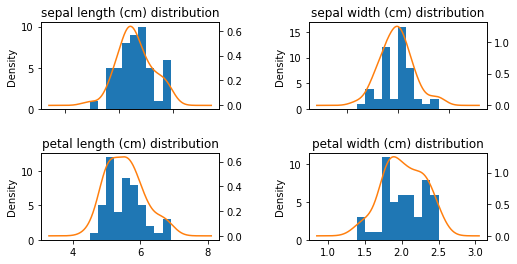

In [ ]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

virginica['sepal length (cm)'].plot(kind='hist',ax=ax[0,0])
virginica['sepal length (cm)'].plot(kind='kde',ax=ax[0,0],
                                 secondary_y = True,
                                 title = 'sepal length (cm) distribution',
                                 figsize=(8,4))

virginica['sepal width (cm)'].plot(kind='hist',ax=ax[0,1])
virginica['sepal width (cm)'].plot(kind='kde',ax=ax[0,1],
                                 secondary_y = True,
                                 title = 'sepal width (cm) distribution',
                                 figsize=(8,4))

virginica['petal length (cm)'].plot(kind='hist',ax=ax[1,0])
virginica['petal length (cm)'].plot(kind='kde',ax=ax[1,0],
                                 secondary_y = True,
                                 title = 'petal length (cm) distribution',
                                 figsize=(8,4))

virginica['petal width (cm)'].plot(kind='hist',ax=ax[1,1])
virginica['petal width (cm)'].plot(kind='kde',ax=ax[1,1],
                                 secondary_y = True,
                                 title = 'petal width (cm) distribution',
                                 figsize=(8,4))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
pred = model.predict(X_test)
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



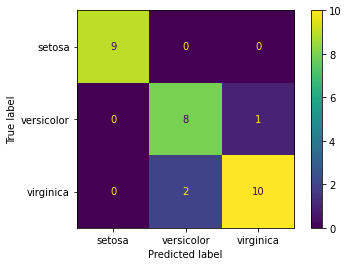

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm,display_labels = load_iris().target_names).plot()

In [ ]:
accuracy_score(y_test, pred)

0.9

In [ ]:
params_nb = {'var_smoothing':[1,0.5,0.1,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001]}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(GaussianNB(priors=[1/3,1/3,1/3]), param_grid=params_nb,
                    cv = list(StratifiedKFold(n_splits=5).split(X_train,y_train)),
                    n_jobs=2)
grid.fit(X_train,y_train)

GridSearchCV(cv=[(array([ 16,  17,  22,  23,  25,  27,  28,  29,  30,  31,  32,  34,  35,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119]),
                  array([ 0,  1,  2,  3,...
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 92, 93, 95, 96, 98]),
                  array([ 91,  94,  97,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]))],
             estimator=GaussianNB(priors=[0.3333333333333333,
                                          0.3333333333

In [ ]:
print('best param: ', grid.best_estimator_)
print('best score: ', grid.best_score_)
best_nb = grid.best_estimator_

best param:  GaussianNB(priors=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
           var_smoothing=0.001)
best score:  0.9583333333333334


In [ ]:
best_nb.fit(X_train,y_train)

GaussianNB(priors=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
           var_smoothing=0.001)

In [ ]:
new_pred = best_nb.predict(X_test)
print(metrics.classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



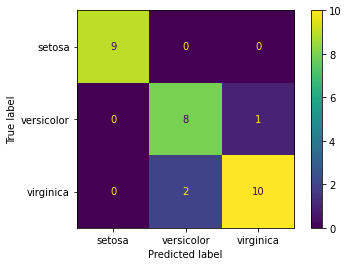

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, new_pred)
ConfusionMatrixDisplay(cm,display_labels = load_iris().target_names).plot()

In [ ]:
accuracy_score(y_test,pred)

0.9

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [ ]:
X = np.array([
              [0,1,1,0],
              [1,1,1,1],
              [1,1,1,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,1,1,0],
              [0,1,1,1],
              [1,0,1,0],
              [1,0,1,1],
              [0,1,1,0]])
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [ ]:
model_bern = BernoulliNB().fit(X,y)

In [ ]:
model_bern.classes_

array([0, 1])

In [ ]:
model_bern.class_count_

array([4., 6.])

In [ ]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [ ]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [ ]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis],4,axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [ ]:
model_bern.alpha

1.0

In [ ]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [ ]:
email_list = [
              {'email title' : 'free game only today','spam':True},
              {'email title' : 'limited time offer only today','spam':True},
              {'email title' : 'cheapest flight deal','spam':True},
              {'email title' : 'today flight schedule','spam':True},
              {'email title' : 'today meeting schedule','spam':False},
              {'email title' : 'Competition winners announced','spam':False},
              {'email title' : 'Notification of change of schedule','spam':False},
              {'email title' : 'your credit card statement','spam':False}
]
df = pd.DataFrame(email_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   email title  8 non-null      object
 1   spam         8 non-null      bool  
dtypes: bool(1), object(1)
memory usage: 200.0+ bytes


In [ ]:
df['label'] = df['spam'].map({True:1, False:0})
df

,email title,spam,label
0,free game only today,True,1
1,limited time offer only today,True,1
2,cheapest flight deal,True,1
3,today flight schedule,True,1
4,today meeting schedule,False,0
5,Competition winners announced,False,0
6,Notification of change of schedule,False,0
7,your credit card statement,False,0


In [ ]:
df_x = df['email title']
df_y = df['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(df_x)
x_traincv

<8x22 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [ ]:
cv.get_feature_names_out()

array(['announced', 'card', 'change', 'cheapest', 'competition', 'credit',
       'deal', 'flight', 'free', 'game', 'limited', 'meeting',
       'notification', 'of', 'offer', 'only', 'schedule', 'statement',
       'time', 'today', 'winners', 'your'], dtype=object)

In [ ]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

In [ ]:
cv.inverse_transform(encoded_input)[0]

array(['free', 'game', 'only', 'today'], dtype='<U12')

In [ ]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [ ]:
test_email_list = [
              {'email title' : 'limited time offer only today','spam':True},
              {'email title' : 'today flight schedule','spam':True},
              {'email title' : 'cheapest game catalogue','spam':True},
              {'email title' : 'hey traveler free flight deal','spam':True},
              {'email title' : 'free flight offer','spam':False},
              {'email title' : 'Competition winners attached','spam':False},
              {'email title' : 'Notification of change of announced','spam':False},
              {'email title' : 'your credit card offer only today','spam':False}
]

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1, False:0})
test_x = test_df['email title']
test_y = test_df['label']
x_testcv = cv.transform(test_x)

In [ ]:
predictions = bnb.predict(x_testcv)
predictions

array([1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(test_y, predictions)

0.75